In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import pandas as pd

df = pd.read_csv("../data/fashion.csv")
df.head()

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...
2,40143,Girls,Apparel,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/p...
3,23623,Girls,Apparel,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/p...
4,47154,Girls,Apparel,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/p...


In [2]:
df.shape

(2906, 10)

In [3]:
df["Category"].unique()

array(['Apparel', 'Footwear'], dtype=object)

In [4]:
df["Category"].value_counts()

Category
Footwear    1580
Apparel     1326
Name: count, dtype: int64

In [5]:
df["Category"].value_counts(normalize=True)

Category
Footwear    0.543703
Apparel     0.456297
Name: proportion, dtype: float64

In [12]:
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.dataset import EcommerceDataset
import torchvision.transforms as transforms

from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

dataset = EcommerceDataset(
    csv_path="../data/fashion.csv",
    image_root_dir="../data",
    transform=transform
)

print(len(dataset))
image, label = dataset[0]
print(image.shape, label)

2906
torch.Size([3, 128, 128]) tensor(0)


In [13]:
from collections import Counter

Counter(dataset.df["Category"])

Counter({'Footwear': 1580, 'Apparel': 1326})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9295317..2.64].


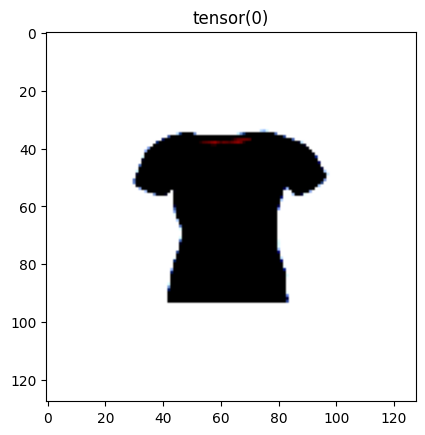

tensor(-1.9295)
tensor(2.6400)
tensor(1.7980)


In [14]:
import matplotlib.pyplot as plt

img, label = dataset[1]
plt.imshow(img.permute(1,2,0))
plt.title(label)
plt.show()
print(img.min())
print(img.max())
print(img.mean())

In [15]:
import torch.nn as nn
from torchvision import models

model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Reemplazamos la última capa
model.fc = nn.Linear(model.fc.in_features, 2)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\castr/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 51.8MB/s]


In [16]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# labels originales (Apparel / Footwear)
labels = dataset.df["Category"].values

indices = list(range(len(dataset)))

train_idx, val_idx = train_test_split(
    indices,
    test_size=0.2,
    stratify=labels,
    random_state=42
)

train_dataset = Subset(dataset, train_idx)
val_dataset = Subset(dataset, val_idx)

print("Train:", len(train_dataset))
print("Val:", len(val_dataset))

Train: 2324
Val: 582


In [17]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

In [18]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([32, 3, 128, 128])
torch.Size([32])
